## Setting up the workspace
In the cell below, we are importing the necessary packages that Python will need to process the code.  You will learn more about packages in our Data Science program.

In [1]:
from wordcloud import WordCloud, STOPWORDS 
import random
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
from ipywidgets import interact
stopwords = set(STOPWORDS)


> In the following cells, you will see the code and the result of that code.  Inside the cells you will see text following a `"#"`, these comments will describe what the line(s) below it is doing.

## Defining the data set

In [2]:
lyrics = "A ba ba ba ba Barbara Ann ba ba ba ba Barbara Ann Barbara Ann Take my hand Barbara Ann you got me rockin' and a rollin' rockin' and a reelin' Barbara Ann ba ba ba Barbara Ann Went to a dance, looking for romance saw Barbara Ann, so I thought I'd take a chance on Barbara Ann Barbara Ann, Barbara Ann take my hand Barbara Ann, Barbara Ann take my hand you got me rockin' and a rollin' rockin' and a reelin' Barbara Ann ba ba ba ba Barbara Ann ba ba ba Barbara Ann ba ba ba Barbara Ann Barbara Ann Take my hand Barbara Ann you got me rockin' and a rollin' rockin' and a reelin' Barbara Ann ba ba ba Barbara Ann tried Peggy Sue tried Peggy Lou tried Mary Lou but I knew she wouldn't do Barbara Ann, Barbara Ann take my hand Barbara Ann take my hand you got me rockin' and a rollin' rockin' and a reelin' Barbara Ann ba ba ba Barbara Ann ba ba ba Barbara Ann ba ba ba Barbara Ann Barbara Ann take my hand Barbara Ann you got me rockin' and a rollin' rockin' and a reelin' Barbara Ann ba ba ba Barbara Ann Barbara Ann, Barbara Ann Barbara Ann, Barbara Ann Barbara Ann, Barbara Ann Barbara Ann"



## Preparing the data
Using the `.replace()` method, the unwanted punctuation will be replaced with nothing, effectively removing it from the string.  
- First, a list is created with pairs of arguments to be passed to the .replace method.  
- Next, a for loop is created which parses the list and with each pass through the loop, the unwanted item is replaced with nothing which simply erases it from the string. 

In [3]:
# This is a list of pairs of arguments which are used as input for the .replace() method.  The first item is the one we want removed and the second is the item we wish to replace it with.

unnecessary = [(',',''), 
              ('  ', ' '), 
              ("'", ''), 
              ('-', ' ')]

# using the list above, passing pairs of old values with the value to replace it. The resulting string is then stored as a new variable 'lyrics_clean'.
for old, new in unnecessary:
    lyrics_clean = lyrics.replace(old, new)
lyrics_word = lyrics_clean

# With the unwanted punctuation removed the string is now transformed to a list using the .split() method

lyrics_list = lyrics_clean.split(' ')
lyrics_unique = set(lyrics_list)

# All of the text is normalized using the .lower() method so 'Ba' and 'ba' are recognized as the same text

lyrics_lower = [i.lower() for i in lyrics_list]
lyrics_lower_unique = set(lyrics_lower)

## Frequency
With the data in  a list, it can now be organized into a frequency dictionary.  This will count the occurrences of each unique word and store the counts as key: value pairs in a Python dictionary.
- First the for loop recursively selects each element one at a time and assigns it to the variable `i`.
- Next a total is calculated by passing the element `i`to the count method.
- Finally the element is stored as the key with the total as the value in the dictionary `frequency`.

In [4]:
frequency = dict()

for i in lyrics_lower_unique:
  total = lyrics_lower.count(i)
  frequency[i] = total

## Visualizing the frequency
In order to get a sense of the makeup of the frequency data we just created, a bar chart is created.
- First, the number of items to graph is set, here it is .5 times the length of the list.
- Next, using matplotlibs pyplot (plt) we create a histogram.
- Then, the labels on the x-axis are rotated 45 degrees to make it more readable.
- Finally, the graph is displayed using plt.show()

By looking at the graph, you can see the words along the bottom (x-axis) and each bar represents the frequency of each word in our list.

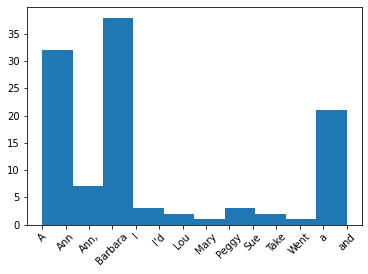

In [5]:
size = int(len(lyrics_list)*.5)
plt.hist(sorted(lyrics_list)[:size])
plt.xticks(rotation=45)
plt.show()

## WordCloud
A fun and sometimes informative way to visualize data is with a WordCloud.  A wordcloud is a representation of the frequency of the elements in the data with the most frequent as the largest font down to the least frequent with the smallest font

In [6]:
def make_wordcloud( prefer_horizontal=0.7,
                    background_color ='blue',
                    collocations=False,
                    max_font_size=256,
                    font_step=1,
                    colormap='inferno', 
                    min_font_size = 10):
    wordcloud = WordCloud(width = 600, height = 600,
                    prefer_horizontal=prefer_horizontal,
                    background_color =background_color,
                    collocations=collocations,
                    max_font_size=max_font_size,
                    font_step=font_step,
                    relative_scaling=0,
                    colormap=colormap, 
                    stopwords = stopwords, 
                    min_font_size = min_font_size).generate(lyrics_clean.lower()) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.show()
c_maps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
          'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
          'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'viridis',
          'plasma', 'inferno', 'magma', 'cividis', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
          'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
          'hot', 'afmhot', 'gist_heat', 'copper', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
          'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
          'twilight', 'twilight_shifted', 'hsv', 'Pastel1', 'Pastel2', 'Paired', 'Accent',
          'Dark2', 'Set1', 'Set2', 'Set3',
          'tab10', 'tab20', 'tab20b', 'tab20c', 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
          'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
          'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']


In [7]:
interact(make_wordcloud, colormap=c_maps, background_color=(0 , 256, 1), prefer_horizontal=(0, 1, .05), font_step=(1, 10, 1), max_font_size=(1,256,1), min_font_size=(1,10,1));

interactive(children=(FloatSlider(value=0.7, description='prefer_horizontal', max=1.0, step=0.05), IntSlider(v…